source: https://github.com/ddangelov/Top2Vec
source: https://youtu.be/bEaxKSQ4Av8?si=kdVEopPuVPHsBBDl
source: https://developer.ibm.com/tutorials/awb-lda-topic-modeling-text-analysis-python/#step-6-evaluate-models8

In [5]:
# load data
from sklearn.datasets import fetch_20newsgroups
from top2vec import Top2Vec
import tensorflow_hub as hub
import os

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# the Universal Sentence Encoder's TF Hub module
model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# topic model
top2vec = Top2Vec(documents=newsgroups.data, embedding_model=model, speed="learn", workers=os.cpu_count())



2024-06-11 17:07:40,391 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
c:\Users\omari\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-06-11 17:07:50,272 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-06-11 17:08:14,662 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-06-11 17:08:46,218 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-06-11 17:08:50,200 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [6]:
topic_sizes, topic_nums = top2vec.get_topic_sizes()
print(topic_sizes)

[1543  937  881  619  613  582  483  438  416  405  403  399  387  356
  344  286  271  269  263  233  231  223  219  211  208  201  199  195
  188  180  176  176  176  172  168  167  163  162  153  149  145  140
  140  140  131  131  127  126  124  123  120  119  117  116  106  100
   99   97   97   94   93   91   91   89   86   86   84   83   83   80
   77   71   70   68   67   67   64   64   63   62   61   61   59   59
   57   56   55   53   52   52   50   49   47   45   44   44   44   42
   40   37   34   29]


In [7]:
print(topic_nums)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]


In [8]:
topic_words, word_scores, topic_nums = top2vec.get_topics()

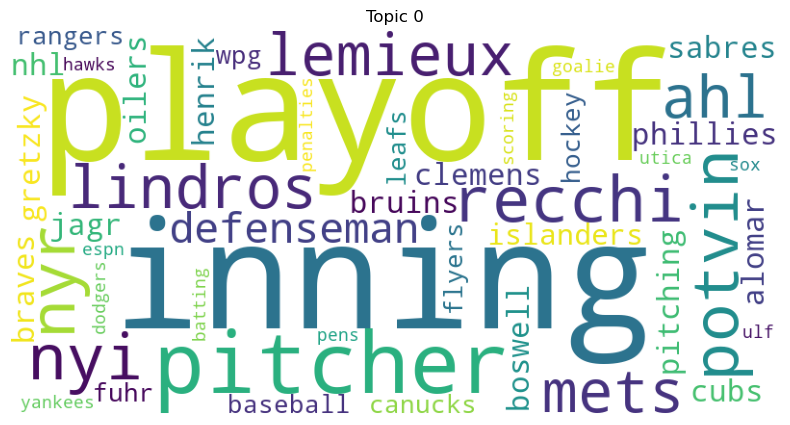

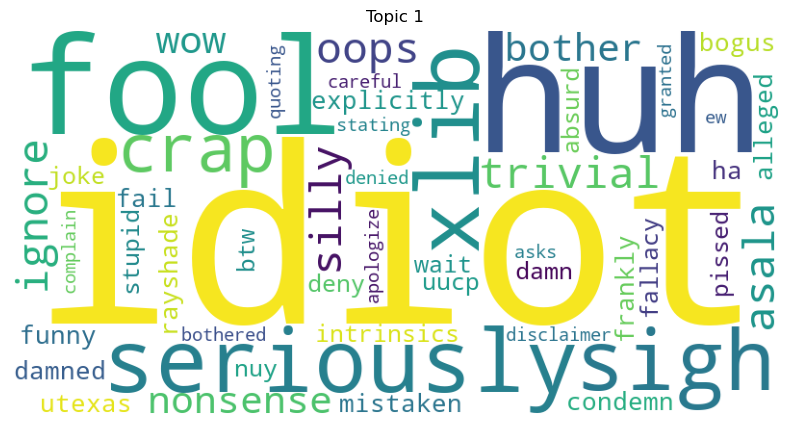

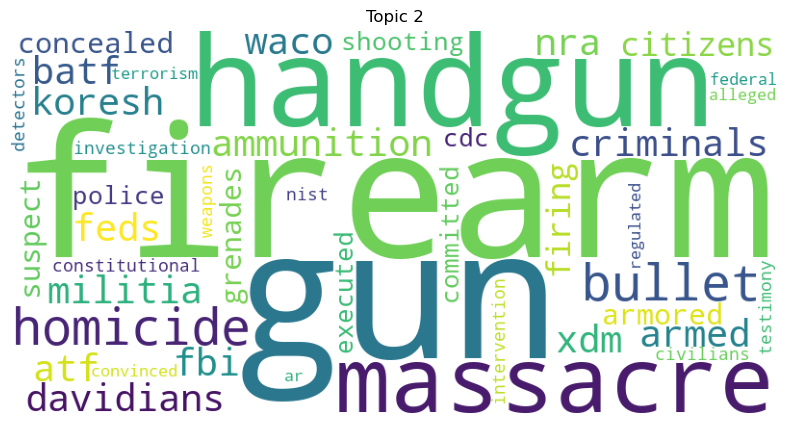

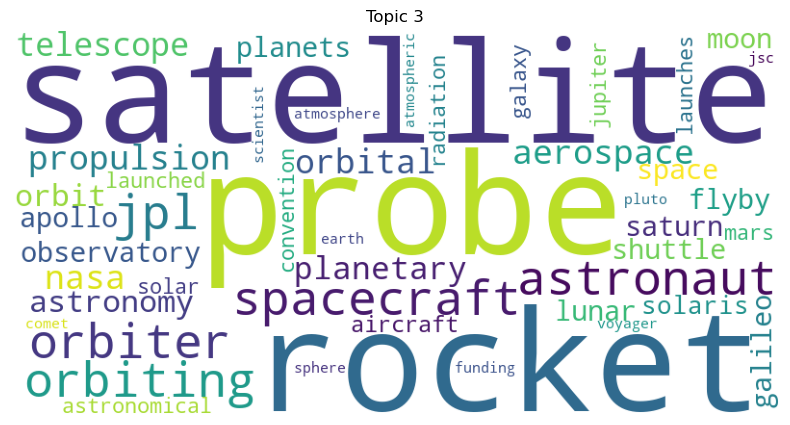

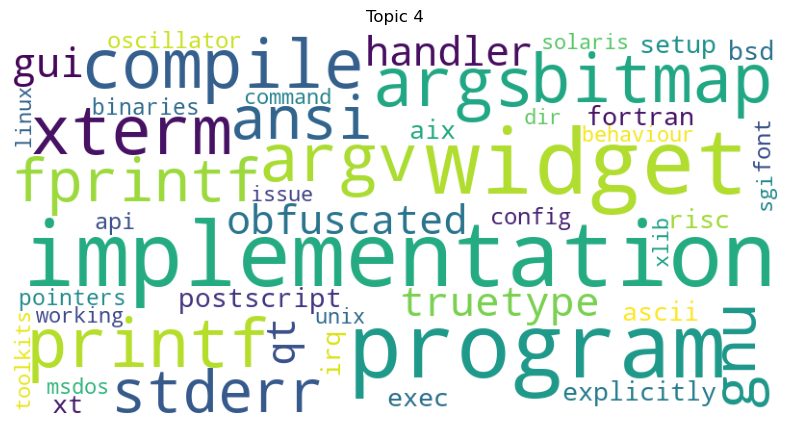

In [9]:
# print first 5 wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, words in enumerate(topic_words):
    if i == 5: #adjust this number to print more or less wordclouds
        break
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Topic {i}")
    plt.show()


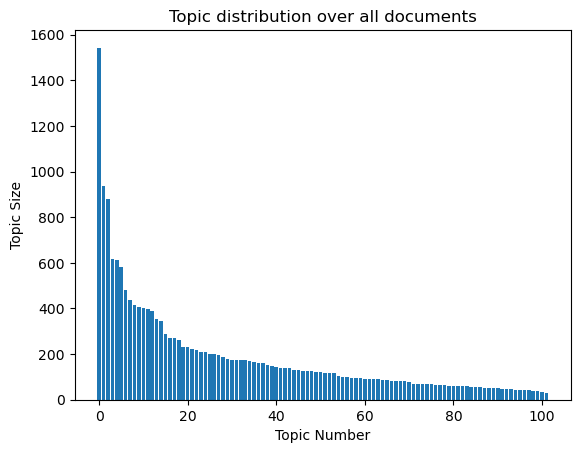

In [10]:
import matplotlib.pyplot as plt

# Assuming `top2vec` is your Top2Vec model
topic_sizes, topic_nums = top2vec.get_topic_sizes()

plt.bar(topic_nums, topic_sizes)
plt.xlabel('Topic Number')
plt.ylabel('Topic Size')
plt.title('Topic distribution over all documents')
plt.show()

In [11]:
# topics and the associated words
topic_words, word_scores, topic_nums = top2vec.get_topics()

for i, words in enumerate(topic_words):
    if i == 2: #adjust this number to print more or less topics
        break
    print(f"Topic {i}")
    print(words)
    print("\n")
    print("----------")
    print("\n")

Topic 0
['recchi' 'potvin' 'nyi' 'nyr' 'lindros' 'lemieux' 'ahl' 'mets'
 'defenseman' 'phillies' 'nhl' 'jagr' 'sabres' 'pitchers' 'alomar'
 'pitching' 'cubs' 'inning' 'gretzky' 'clemens' 'bruins' 'boswell'
 'innings' 'henrik' 'braves' 'oilers' 'playoffs' 'islanders' 'baseball'
 'canucks' 'hockey' 'playoff' 'flyers' 'fuhr' 'leafs' 'wpg' 'rangers'
 'yankees' 'sox' 'utica' 'dodgers' 'goalie' 'ulf' 'batting' 'espn' 'hawks'
 'scoring' 'pitcher' 'penalties' 'pens']


----------


Topic 1
['idiot' 'huh' 'fool' 'seriously' 'xlib' 'sigh' 'crap' 'trivial' 'oops'
 'silly' 'ignore' 'asala' 'nonsense' 'wow' 'bother' 'explicitly' 'frankly'
 'ha' 'condemn' 'utexas' 'rayshade' 'fail' 'funny' 'bogus' 'alleged'
 'damned' 'mistaken' 'intrinsics' 'absurd' 'btw' 'uucp' 'joke' 'deny'
 'nuy' 'fallacy' 'damn' 'wait' 'pissed' 'stupid' 'stating' 'quoting' 'ew'
 'granted' 'disclaimer' 'bothered' 'complain' 'careful' 'denied'
 'apologize' 'asks']


----------




# Evaluation
# The higher the evaluation score the better. .96 is considered good.

In [12]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Top2Vec model
topic_words, _, _ = top2vec.get_topics(top2vec.get_num_topics())

# Gensim dictionary from the topic words
dictionary = Dictionary(topic_words)

# Gensim corpus from the topic words
corpus = [dictionary.doc2bow(words) for words in topic_words]

# CoherenceModel
coherence_model = CoherenceModel(topics=topic_words, texts=topic_words, dictionary=dictionary, coherence='c_v')

# Get the coherence score
coherence = coherence_model.get_coherence()
print(coherence)

0.9662568760193395
